In [145]:
import random
from random import randint
import matplotlib.pyplot as plt
from math import floor, sqrt

In [146]:
def L(i, mod, n_of_points, l):

  prod = 1

  for j in range(n_of_points-1):
    if i != j:
      prod = (prod * ((l[j]) * pow((l[j] - l[i]), -1, mod))) % mod

  return prod

In [147]:
def lambdas(n_of_points, mod):

  if n_of_points > mod:
    return "Error"

  l = []
  for j in range(1, mod):
    l.append(j)
  random.shuffle(l)

  #print("list of xi's: ", l)

  return [(lambda x: L(x, mod, n_of_points, l))(x) for x in range(n_of_points-1)]

In [148]:
lambdas(7, 37)

[29, 8, 20, 28, 31, 33]

In [149]:
def monte_carlo_all(n_of_trials, n_of_points, mod, print_words=1, print_chart=0):
    # Create frequency dictionary
    freq_dict = {i: 0 for i in range(1, mod)}
    
    # Update frequency dictionary for all trials
    for i in range(n_of_trials):
        lst = lambdas(n_of_points, mod)
        for item in lst:
            freq_dict[item] += 1
    
    # Print in words
    if print_words:
      for key, value in freq_dict.items():
          print(f"Element {key}: Frequency {value/n_of_trials:.3f}")

    # Print with chart bar
    if print_chart:
      x = list(freq_dict.keys())
      y = [freq_dict[i]/n_of_trials for i in x]
      
      fig, ax = plt.subplots()
      ax.bar(x, y)
      ax.axhline(y=(n_of_points-1)/(mod-1), color='r', linestyle='--')
      ax.set_xlabel('Element')
      ax.set_ylabel('Frequency')
      ax.set_title(f'Frequency of Elements for mod={mod}, n_of_points={n_of_points}, n_of_trials={n_of_trials}')
      ax.set_ylim([0, (10/9)*(n_of_points/mod)])
      plt.show()


n_of_points is: 15


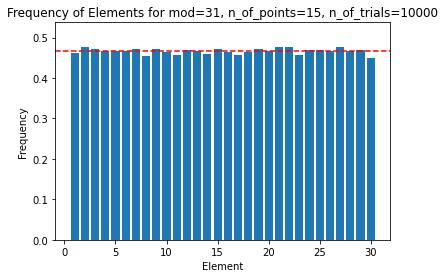

In [150]:
mod = 31
n_of_points = floor(mod/2) #floor(sqrt(mod))
print("n_of_points is:", n_of_points)
monte_carlo_all(10000, n_of_points, mod, 0, 1)

In [157]:
def monte_carlo_one(n_of_trials, n_of_points, mod, print_words=1, print_chart=0):
    # Create frequency dictionary
    freq_dict = {i: 0 for i in range(1, mod)}
    
    # Update frequency dictionary for all trials
    for i in range(n_of_trials):
        lst = lambdas(n_of_points, mod)
        freq_dict[lst[0]] += 1
    
    # Print in words
    if print_words:
      for key, value in freq_dict.items():
          print(f"Element {key}: Frequency {value/n_of_trials:.3f}")

    # Print with chart bar
    if print_chart:
      x = list(freq_dict.keys())
      y = [freq_dict[i]/n_of_trials for i in x]
      
      fig, ax = plt.subplots()
      ax.bar(x, y)
      ax.axhline(y=(1)/(mod-1), color='r', linestyle='--')
      ax.set_xlabel('Element')
      ax.set_ylabel('Frequency')
      ax.set_title(f'Frequency of Elements for mod={mod}, n_of_points={n_of_points}, n_of_trials={n_of_trials}')
      ax.set_ylim([0, (11/9)*(1/mod)])
      plt.show()

n_of_points is: 15


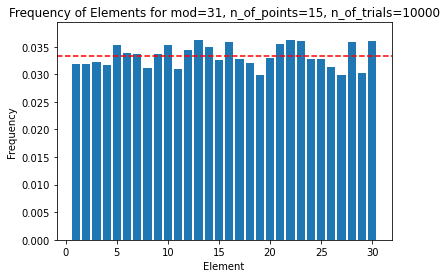

In [162]:
mod = 31
n_of_points = floor(mod/2) #floor(sqrt(mod))
print("n_of_points is:", n_of_points)
monte_carlo_one(10000, n_of_points, mod, 0, 1)